# This notebook contains instructions on how this software package is used to train on on previous nba games, and by doing so attempt to predict the outcome of future ones. In this case, I will be using game 4 of the 2018 NBA finals as an example. 

In [1]:
#Step 1. Load in the data and dependencies. 
%matplotlib inline
import numpy as np
import NNBA
import prediction_stuff
import matplotlib.pyplot as plt
np.random.seed(11)  #For reproducibility. And because Brook Lopez is the best. 
#note there is continuation, so if you run it twice without resetting the kernel the restuls will be different. 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:

#Create a model for predicting the spread outcome of a game.

nbapredictorSPREAD,scaler = NNBA.make_network('NBADATA.csv',sklearn=False,
                                          keras=True,normalize=True,
                                          spread=True)




keras NN goes here
Train on 3820 samples, validate on 955 samples
Epoch 1/20
3820/3820 [==============================] - 1s 209us/step - loss: 0.8132 - acc: 0.5589 - val_loss: 0.7049 - val_acc: 0.6963
Epoch 2/20
3820/3820 [==============================] - 0s 40us/step - loss: 0.5661 - acc: 0.7529 - val_loss: 0.5256 - val_acc: 0.7749
Epoch 3/20
3820/3820 [==============================] - 0s 41us/step - loss: 0.4247 - acc: 0.8259 - val_loss: 0.4284 - val_acc: 0.8220
Epoch 4/20
3820/3820 [==============================] - 0s 40us/step - loss: 0.3665 - acc: 0.8560 - val_loss: 0.3993 - val_acc: 0.8366
Epoch 5/20
3820/3820 [==============================] - 0s 40us/step - loss: 0.3343 - acc: 0.8709 - val_loss: 0.3821 - val_acc: 0.8471
Epoch 6/20
3820/3820 [==============================] - 0s 40us/step - loss: 0.3173 - acc: 0.8796 - val_loss: 0.4027 - val_acc: 0.8314
Epoch 7/20
3820/3820 [==============================] - 0s 40us/step - loss: 0.3153 - acc: 0.8822 - val_loss: 0.4046 - val_

This printed result means that when it scanned over NBADATA.csv, a file created using nba_py (documented in NNBA.py), after training over 3820 games and testing over 955 games, the nbapredictor neural network could correctly classify whether or not an nba game hit the over or under 86% of the time.

Note this is based on the box scores of existing games! The challenge now is to find a way to predict what the box score of a future NBA game will turn out to be. In the cells below, we use the season splits of the Cleveland Cavaliers and Golden State Warriors to predict the spread winner of each game of the 2018 NBA Finals. 

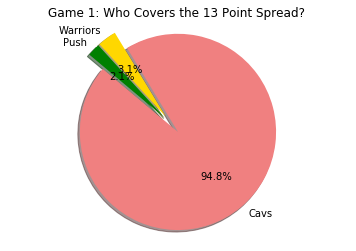

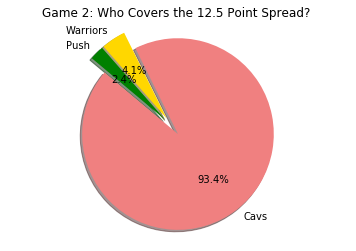

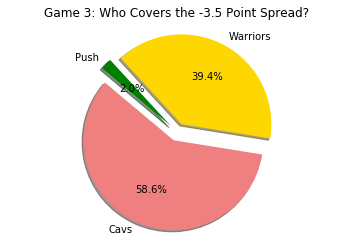

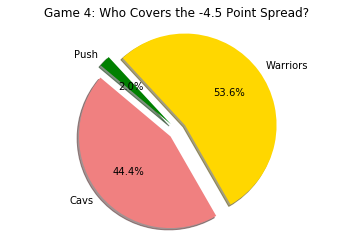

In [3]:
CLE = prediction_stuff.get_splits('CLE')
GSW = prediction_stuff.get_splits('GSW')
spread1 = 13
spread2 = 12.5
spread3 = -3.5
spread4 = -4.5
spreads = [spread1,spread2,spread3,spread4]

CLEGSW1 = prediction_stuff.spread_game_maker(CLE,GSW,spread1,scaler)
CLEGSW2 = prediction_stuff.spread_game_maker(CLE,GSW,spread2,scaler)
CLEGSW3 = prediction_stuff.spread_game_maker(GSW,CLE,spread3,scaler)
CLEGSW4 = prediction_stuff.spread_game_maker(GSW,CLE,spread4,scaler)

the_finals = [CLEGSW1,CLEGSW2,CLEGSW3,CLEGSW4]

for i,game in enumerate(the_finals):
    prediction =  nbapredictorSPREAD.predict(game)
    plt.figure()
    # Data to plot
    labels = 'Cavs', 'Warriors', 'Push'
    sizes = prediction[0]
    colors = ['lightcoral', 'gold', 'green']
    explode = (0.1, 0.1, 0.1)  # explode each slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.title("Game "+str(i+1)+": Who Covers the " + str(spreads[i])+ " Point Spread? ")

In the end, this model ends up successfully --or the highest % belonging to the true winner--  4 out of the 4 times! I'd still consult other sources for game 3 though. Granted a small sample size, this model shows promise when extended throughout the entire NBA playoffs, and we look forward to seeing what comes of it start the 2018-19 NBA season. 

Of course there are many flaws with this system as the box score of a game will almost never be the exact regular season splits of a team. But this serves as a good starting point in learning more about NBA game prediction and modelling. 


And for other types of outcomes, the over under and ML are still experimental but follow the same procedure. Neither are as coherently programmed as this one so this is the launching point of our project. 

In [9]:
nbapredictorML,scaler = NNBA.make_network('NBADATA.csv',sklearn=False,
                                          keras=True,normalize=True,
                                          moneyline=True)

keras NN goes here
Train on 3820 samples, validate on 955 samples
Epoch 1/20
3820/3820 [==============================] - 1s 224us/step - loss: 0.6239 - acc: 0.6419 - val_loss: 0.4914 - val_acc: 0.7738
Epoch 2/20
3820/3820 [==============================] - 0s 42us/step - loss: 0.3552 - acc: 0.8461 - val_loss: 0.2713 - val_acc: 0.8901
Epoch 3/20
3820/3820 [==============================] - 0s 42us/step - loss: 0.2283 - acc: 0.9005 - val_loss: 0.2349 - val_acc: 0.9005
Epoch 4/20
3820/3820 [==============================] - 0s 42us/step - loss: 0.1889 - acc: 0.9188 - val_loss: 0.1995 - val_acc: 0.9194
Epoch 5/20
3820/3820 [==============================] - 0s 43us/step - loss: 0.1730 - acc: 0.9249 - val_loss: 0.1862 - val_acc: 0.9236
Epoch 6/20
3820/3820 [==============================] - 0s 46us/step - loss: 0.1600 - acc: 0.9335 - val_loss: 0.2219 - val_acc: 0.9141
Epoch 7/20
3820/3820 [==============================] - 0s 45us/step - loss: 0.1557 - acc: 0.9364 - val_loss: 0.1779 - val_

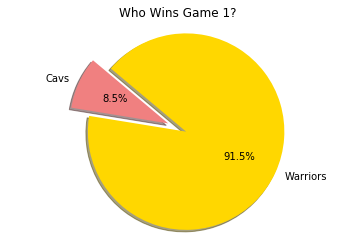

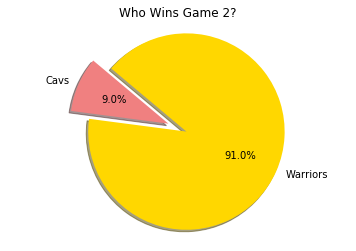

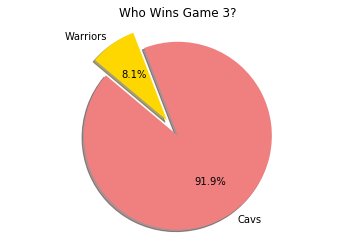

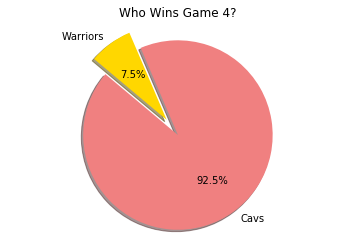

In [15]:
CLE = prediction_stuff.get_splits('CLE')
GSW = prediction_stuff.get_splits('GSW')
spread1 = 13
spread2 = 12.5
spread3 = -3.5
spread4 = -4.5
spreads = [spread1,spread2,spread3,spread4]

CLEGSW1 = prediction_stuff.ML_game_maker(CLE,GSW,spread1,scaler)
CLEGSW2 = prediction_stuff.ML_game_maker(CLE,GSW,spread2,scaler)
CLEGSW3 = prediction_stuff.ML_game_maker(GSW,CLE,spread3,scaler)
CLEGSW4 = prediction_stuff.ML_game_maker(GSW,CLE,spread4,scaler)

the_finals = [CLEGSW1,CLEGSW2,CLEGSW3,CLEGSW4]

for i,game in enumerate(the_finals):
    prediction =  nbapredictorML.predict(game)
    plt.figure()
    # Data to plot
    labels = 'Cavs', 'Warriors'
    sizes = prediction[0]
    colors = ['lightcoral', 'gold', 'green']
    explode = (0.1, 0.1)  # explode each slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.title("Who Wins Game "+ str(i+1) + "?")